In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from qutip import *
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.integrate import simpson
from scipy import stats
plt.rcParams.update({'font.size': 14})

In [2]:
def model(z,t,myu,q0):
    omega=1
    x=z[0]
    y=z[1]
    dxdt=omega*y
    dydt=-myu*dxdt*(x**2-q0**2)-omega*x
    dzdt=[dxdt,dydt]
    return dzdt
def coper(N,q0,myu):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    const1=myu*(q0**2-1)
    const2=3*myu/4
    c1=sqrt(const1)*adag
    c2=sqrt(const2)*a**2
    c3=sqrt(myu)*(adag*a-0.5*adag**2)
    cops.append(c1)
    cops.append(c2)
    cops.append(c3)
    return cops
def hamil(N,omega,q0,myu):
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    H=omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))
    return H
def retdiag(rho,N):
    rhoii=[]
    n=[]
    for i in range(N):
        rhoii.append(rho.diag())
        n.append(i+1)
    return n,rhoii
def retdens(H,cops,N):
    expop=rand_dm(N)
    times = np.linspace(0.0, 100.0, 10000)
    result_dm = mesolve(H, expop, times, cops)
    return result_dm.states    
def Gauss(x, A, B, C):
    y = A*np.exp(-((x-B)/C)**2)
    return y
def expdecay(x,lam,A):
    y=A*np.exp(-lam*x)
    return y
def linfit(x,lam,C):
    y=lam*x+C
    return y
def sinfreq(x,A,omega,phi):
    y=A*np.sin(omega*x+phi)
    return y
def eig(myu,qo,omega):
    e=[((myu*q0**2)+1j*sqrt(4*omega**2-(myu**2)*q0**4))/2,((myu*q0**2)-1j*sqrt(4*omega**2-(myu**2)*q0**4))/2]
    return e
def retindex(tl,period):
    index2=0
    t2=0
    t2=tl[0]+abs(period)
    epi=0.01
    for i in range(len(tl)):
        if tl[i]<=(t2+epi) and tl[i]>=(t2-epi):
            index2=i
    return index2
def jacob(omega,q0,myu,q,p):
    j=np.zeros((2,2))
    j[0][0]=0
    j[0][1]=omega
    j[1][0]=-2*myu*q*p-omega
    j[1][1]=-myu*(q**2-q0**2)
    return j
def floquet(omega,q0,myu,position,momentum,times,T):
    final=np.identity(2)
    I=np.identity(2)
    for i in range(len(times)):
        q=position[i]
        p=momentum[i]
        final=final*(I+(T/len(times))*(jacob(omega,q0,myu,q,p)))
    return final
def square(list):
    return [i ** 2 for i in list]
    

In [3]:
q0=3
omega=1
N=30

times = np.linspace(0.0, 100.0, 10000)

In [5]:
#myu=[0.001,0.1,1,10,20,100]
#myu=[0.001,0.1,1,3,5,7,10]
myu=[0.001,0.02,0.05,1]
H=[]
cops=[]
ss=[]

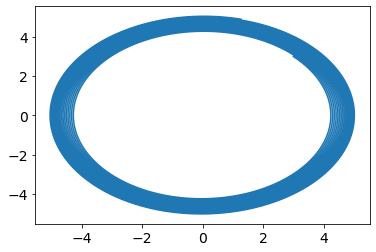

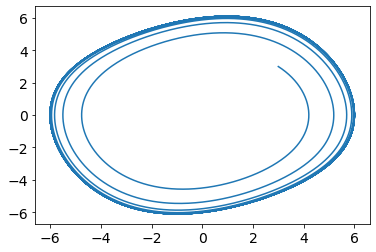

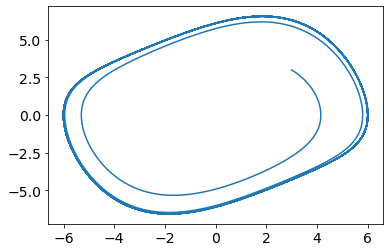

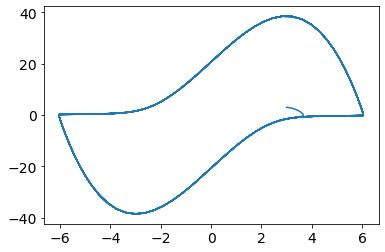

In [6]:
for j in range(len(myu)):
    x = np.empty_like(times)
    y = np.empty_like(times)
    z0=[3,3]
    x[0] = z0[0]
    y[0] = z0[1]
    q0=3
    plt.figure()
    for i in range(1,len(times)):
        tspan = [times[i-1],times[i]]
        z = odeint(model,z0,tspan,args=(myu[j],q0))
        x[i] = z[1][0]
        y[i] = z[1][1]
        z0 = z[1]
    plt.plot(x[:],y[:])
    

In [7]:
for i in range(len(myu)):
    m=myu[i]
    h=hamil(N,omega,q0,m)
    c=coper(N,q0,m)
    s=steadystate(h,c)
    H.append(h)
    cops.append(c)
    ss.append(s)

In [8]:
x=np.linspace(-8,+8,200)
p=np.linspace(-8,+8,200)

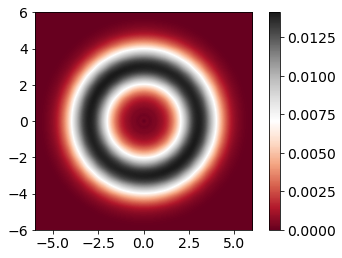

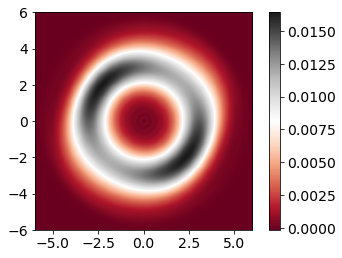

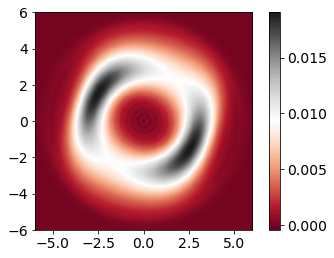

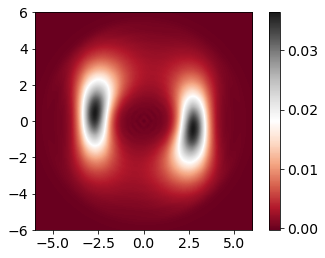

In [9]:
for i in range(len(myu)):
    wc=wigner(ss[i],x,p)
    plt.figure()
    plt.imshow(wc, extent=[-6, 6, -6, 6], origin='lower',
           cmap='RdGy')
    plt.colorbar()

In [10]:
ss[-1]

Quantum object: dims = [[30], [30]], shape = (30, 30), type = oper, isherm = True
Qobj data =
[[ 3.87513067e-03+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   9.26857214e-04+1.06236036e-03j  0.00000000e+00+0.00000000e+00j
   4.58788233e-04+4.71801341e-04j  0.00000000e+00+0.00000000e+00j
   1.48638656e-04+1.65901969e-04j  0.00000000e+00+0.00000000e+00j
   2.00986584e-05+3.75776649e-05j  0.00000000e+00+0.00000000e+00j
  -3.39973452e-06+3.02538619e-06j  0.00000000e+00+0.00000000e+00j
  -1.92207978e-06-1.03310366e-06j  0.00000000e+00+0.00000000e+00j
  -2.17038759e-07-3.54181564e-07j  0.00000000e+00+0.00000000e+00j
   5.74513514e-08-1.65446466e-08j  0.00000000e+00+0.00000000e+00j
   1.97389196e-08+1.34491957e-08j  0.00000000e+00+0.00000000e+00j
  -2.40852543e-10+2.45826066e-09j  0.00000000e+00+0.00000000e+00j
  -1.17491072e-09-4.74866928e-10j  0.00000000e+00+0.00000000e+00j
  -1.83475524e-10-2.46901169e-10j  0.00000000e+00+0.00000000e+00j
   3.41806036e-11-2.70488146e-11j  0.00000000e+0

In [11]:
myu=[0.001,0.02,0.05,1]
#myu=[0.001,0.02,0.05,1]

In [12]:
for i in range(len(myu)):
    m=myu[i]
    h=hamil(N,omega,q0,m)
    c=coper(N,q0,m)
    s=steadystate(h,c)
    H.append(h)
    cops.append(c)
    ss.append(s)

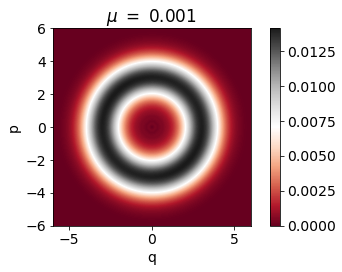

In [13]:
wc=wigner(ss[0],x,p)
plt.imshow(wc, extent=[-6, 6, -6, 6], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.title(r'$\mu$ $=$ $0.001$')
plt.xlabel('q')
plt.ylabel('p')
plt.tight_layout()
plt.savefig('wig0.001.png')

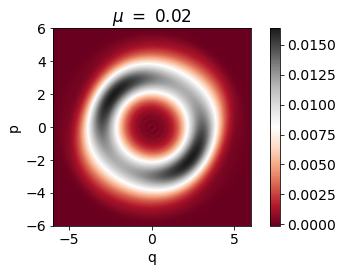

In [14]:
wc=wigner(ss[1],x,p)
plt.imshow(wc, extent=[-6, 6, -6, 6], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.title(r'$\mu$ $=$ $0.02$')
plt.xlabel('q')
plt.ylabel('p')
plt.tight_layout()
plt.savefig('wig0.02.png')

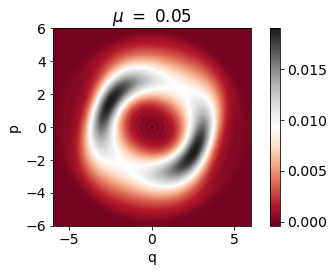

In [15]:
wc=wigner(ss[2],x,p)
plt.imshow(wc, extent=[-6, 6, -6, 6], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.title(r'$\mu$ $=$ $0.05$')
plt.xlabel('q')
plt.ylabel('p')
plt.tight_layout()
plt.savefig('wig0.05.png')

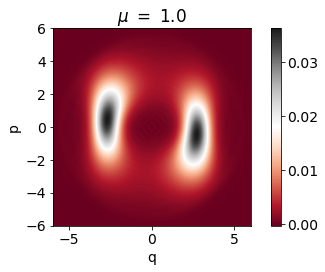

In [16]:
wc=wigner(ss[3],x,p)
plt.imshow(wc, extent=[-6, 6, -6, 6], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.title(r'$\mu$ $=$ $1.0$')
plt.xlabel('q')
plt.ylabel('p')
plt.tight_layout()
plt.savefig('wig1.0.png')

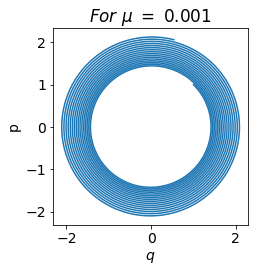

In [32]:
t=times
z0=[1,1]
n=500
x = np.empty_like(t)
y = np.empty_like(t)
x[0] = z0[0]
y[0] = z0[1]
myu[0]
for i in range(1,len(t)):
    tspan = [t[i-1],t[i]]
    z = odeint(model,z0,tspan,args=(myu[0],q0,))
    x[i] = z[1][0]
    y[i] = z[1][1]
    z0 = z[1]
plt.plot(x[0:],y[0:])
plt.xlabel(r'$q$')
plt.ylabel('p')
plt.title(r'$For$ $\mu$ $=$ $0.001$')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig("vdplimt0.001.png")

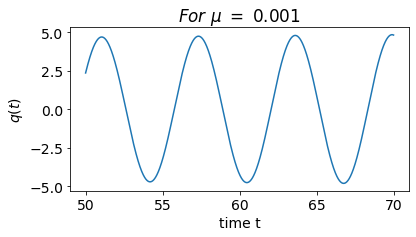

In [18]:
plt.plot(t[5000:7000],x[5000:7000])
#plt.plot(t,x)
plt.ylabel(r'$q(t)$')
plt.xlabel('time t')
plt.title(r'$For$ $\mu$ $=$ $0.001$')
plt.gca().set_aspect('equal')
plt.tight_layout()

plt.savefig('0.001xtout.png')

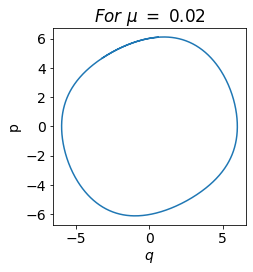

In [19]:
t=times
z0=[3,3]
n=500
x = np.empty_like(t)
y = np.empty_like(t)
x[0] = z0[0]
y[0] = z0[1]
myu[1]
for i in range(1,len(t)):
    tspan = [t[i-1],t[i]]
    z = odeint(model,z0,tspan,args=(myu[1],q0,))
    x[i] = z[1][0]
    y[i] = z[1][1]
    z0 = z[1]
plt.plot(x[9300:],y[9300:])
plt.xlabel(r'$q$')
plt.ylabel('p')
plt.title(r'$For$ $\mu$ $=$ $0.02$')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig("vdplimt0.02.png")

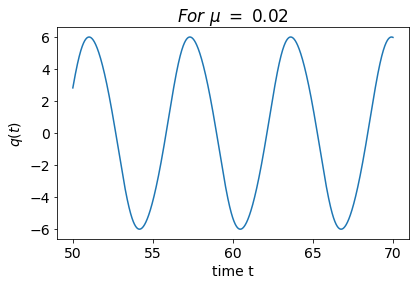

In [20]:
plt.plot(t[5000:7000],x[5000:7000])
#plt.plot(t,x)
plt.ylabel(r'$q(t)$')
plt.xlabel('time t')
plt.title(r'$For$ $\mu$ $=$ $0.02$')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig('0.02xtout.png')

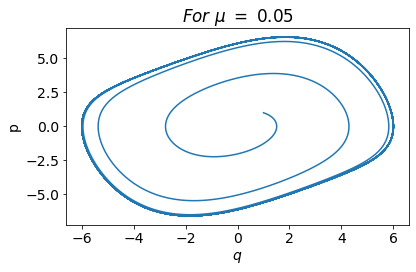

In [35]:
t=times
z0=[1,1]
n=500
x = np.empty_like(t)
y = np.empty_like(t)
x[0] = z0[0]
y[0] = z0[1]
myu[2]
for i in range(1,len(t)):
    tspan = [t[i-1],t[i]]
    z = odeint(model,z0,tspan,args=(myu[2],q0,))
    x[i] = z[1][0]
    y[i] = z[1][1]
    z0 = z[1]
plt.plot(x[0:],y[0:])
plt.xlabel(r'$q$')
plt.ylabel('p')
plt.title(r'$For$ $\mu$ $=$ $0.05$')
plt.tight_layout()
plt.savefig("vdpall0.05.png")

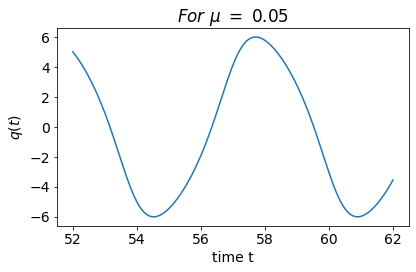

In [27]:
plt.plot(t[5200:6200],x[5200:6200])
#plt.plot(t,x)
plt.ylabel(r'$q(t)$')
plt.xlabel('time t')
plt.title(r'$For$ $\mu$ $=$ $0.05$')
plt.tight_layout()
plt.savefig('0.05xtout.png')

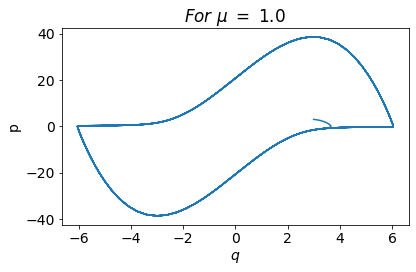

In [33]:
t=times
z0=[3,3]
n=500
x = np.empty_like(t)
y = np.empty_like(t)
x[0] = z0[0]
y[0] = z0[1]
myu[3]
for i in range(1,len(t)):
    tspan = [t[i-1],t[i]]
    z = odeint(model,z0,tspan,args=(myu[3],q0,))
    x[i] = z[1][0]
    y[i] = z[1][1]
    z0 = z[1]
plt.plot(x[0:],y[0:])
plt.xlabel(r'$q$')
plt.ylabel('p')
plt.title(r'$For$ $\mu$ $=$ $1.0$')
plt.tight_layout()
plt.savefig("vdpall1.0.png")

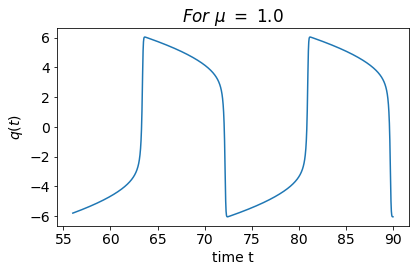

In [29]:
plt.plot(t[5600:9000],x[5600:9000])
#plt.plot(t,x)
plt.ylabel(r'$q(t)$')
plt.xlabel('time t')
plt.title(r'$For$ $\mu$ $=$ $1.0$')
plt.tight_layout()
plt.savefig('1.0xtout.png')